In [1]:
#Import Python Data Science and Machine Learning Libraries 

#Python Libraries
import pandas as pd
import pylab as pl
import numpy as np
import itertools

#Frameworks
import tensorflow as tf

#Visualizations and Graphics
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
!conda install python-graphviz --yes
import graphviz
from sklearn.tree import export_graphviz
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report

#Models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn import tree

#Model Parameters
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification

#Model Metrics
import sklearn.metrics as metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\cwl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
model_df = pd.read_csv('model_df.csv',index_col = 0)
model_df.head()

,X,Y,INTKEY,SEVCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,HofD,Year,Month,Day,colltype_code,addrtype_code,junctype_code,weather_code,roadcond_code,lightcond_code
0,-122.323148,47.703140,1.0,2.0,1.0,2.0,0.0,0.0,2.0,11.0,...,15.0,2013.0,3.0,27.0,0.0,2.0,1.0,11.0,9.0,9.0
1,-122.347294,47.647172,0.0,1.0,0.0,2.0,0.0,0.0,2.0,16.0,...,19.0,2006.0,12.0,20.0,9.0,1.0,4.0,11.0,9.0,9.0
2,-122.334540,47.607871,0.0,1.0,0.0,4.0,0.0,0.0,3.0,14.0,...,10.0,2004.0,11.0,18.0,5.0,1.0,4.0,11.0,9.0,9.0
3,-122.334803,47.604803,0.0,1.0,0.0,3.0,0.0,0.0,3.0,11.0,...,9.0,2013.0,3.0,29.0,4.0,1.0,4.0,11.0,9.0,9.0
4,-122.306426,47.545739,1.0,2.0,1.0,2.0,0.0,0.0,2.0,11.0,...,8.0,2004.0,1.0,28.0,0.0,2.0,1.0,11.0,9.0,9.0


In [11]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [ ]:
model_cols = ['X','Y','INTKEY','SEVCODE','SEVERITYDESC','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT',
        'VEHCOUNT','SDOT_COLCODE','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING',
        'HITPARKEDCAR','HofD','Year','Month','Day','colltype_code','addrtype_code',
        'junctype_code','weather_code','roadcond_code','lightcond_code']

In [44]:
colset1 = ['PEDCOUNT','PEDCYLCOUNT','VEHCOUNT', 'SEVCODE']
model_df_colset1 = select_columns(model_df, colset1)

colset2 = ['HofD','Month','Day', 'SEVCODE']
model_df_colset2 = select_columns(model_df, colset2)

colset3 = ['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING',
        'HITPARKEDCAR', 'SEVCODE']
model_df_colset3 = select_columns(model_df, colset3)

colset4 = ['colltype_code','addrtype_code',
        'junctype_code','weather_code','roadcond_code','lightcond_code', 'SEVCODE']
model_df_colset4 = select_columns(model_df, colset4)

colset5 = ['SDOT_COLCODE', 'SEVCODE']
model_df_colset5 = select_columns(model_df, colset5)

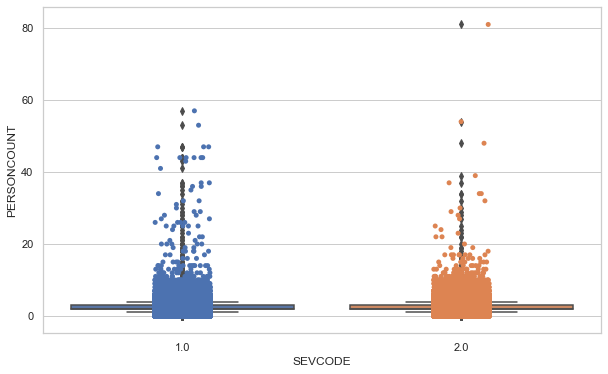

In [18]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SEVCODE',y='PERSONCOUNT',data=model_df)
ax = sns.stripplot(x="SEVCODE", y="PERSONCOUNT",data=model_df)

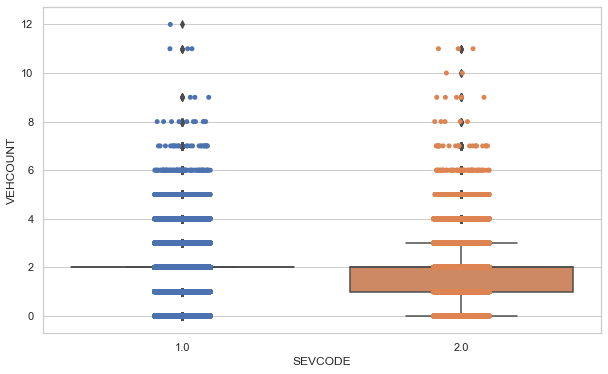

In [31]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SEVCODE',y='VEHCOUNT',data=model_df)
ax = sns.stripplot(x="SEVCODE", y="VEHCOUNT",data=model_df)

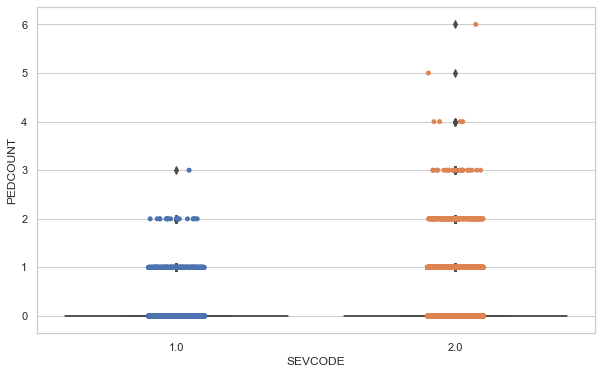

In [33]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SEVCODE',y='PEDCOUNT',data=model_df)
ax = sns.stripplot(x="SEVCODE", y="PEDCOUNT",data=model_df)

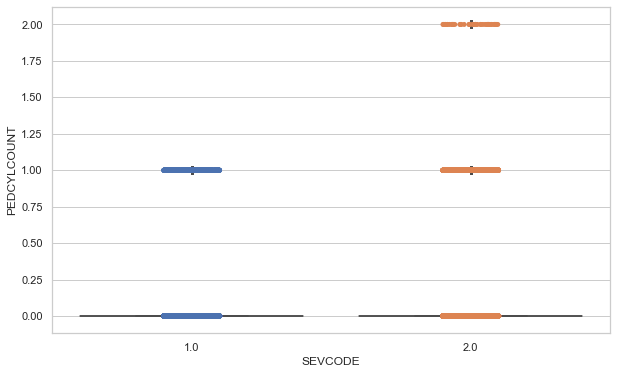

In [34]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SEVCODE',y='PEDCYLCOUNT',data=model_df)
ax = sns.stripplot(x="SEVCODE", y="PEDCYLCOUNT",data=model_df)

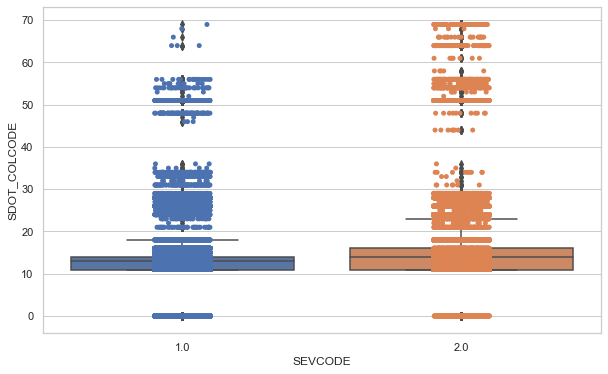

In [36]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SEVCODE',y='SDOT_COLCODE',data=model_df)
ax = sns.stripplot(x="SEVCODE", y="SDOT_COLCODE",data=model_df)

In [258]:
model_df_colset5.assign(SCOLCODE_1="",SCOLCODE_2="")
model_df_colset5.loc[model_df_colset5['SEVCODE'] == 1, 'SCOLCODE_1'] = model_df_colset5['SDOT_COLCODE'].astype(int)
model_df_colset5.loc[model_df_colset5['SEVCODE'] == 2, 'SCOLCODE_2'] = model_df_colset5['SDOT_COLCODE'].astype(int)
model_df_colset5.head()
model_df_colset5.describe()

,SDOT_COLCODE,SEVCODE,SCOLCODE_1,SCOLCODE_2
count,194673.000000,194673.000000,136485.000000,58188.000000
mean,14.197829,1.298901,13.446115,15.961040
std,6.518526,0.457778,5.408594,8.313204
min,0.000000,1.000000,0.000000,0.000000
25%,11.000000,1.000000,11.000000,11.000000
50%,14.000000,1.000000,13.000000,14.000000
75%,14.000000,2.000000,14.000000,16.000000
max,69.000000,2.000000,69.000000,69.000000


In [259]:
colcod1_df['SCOLCODE_1'] = model_df_colset5['SCOLCODE_1'].dropna() 
colcod2_df['SCOLCODE_2'] = model_df_colset5['SCOLCODE_2'].dropna()

colcod1_df.head()

1    16
2    14
3    11
5    11
6    11
Name: SCOLCODE_1, dtype: object

In [260]:
colcod1_df.describe()

count     136486.0
unique        37.0
top           11.0
freq       60657.0
Name: SCOLCODE_1, dtype: float64

In [261]:
ccod1 = colcod1_df['SCOLCODE_1'].value_counts().to_frame()
ccod1.head()

,SCOLCODE_1
11.0,60657
14.0,41439
16.0,9219
28.0,6548
13.0,5260


In [262]:
ccod2_df = colcod2_df['SCOLCODE_2'].value_counts().to_frame()
ccod2_df.head()

,SCOLCODE_2
11.0,24330
14.0,18241
24.0,5841
18.0,2728
28.0,2279


In [263]:
ccodm_df = pd.merge(ccod1, ccod2_df, left_index=True, right_index=True)
ccodm_df.astype(int)
ccodm_df.sort_index(inplace=True) 
#ccodm_df.reset_index(inplace=True)
#ccodm_df = ccodm_df.rename(columns={'index': 'code'})
ccodm_df.head()
#ccodm_df = ccodm_df.transpose()
#ccodm_df.head()

,SCOLCODE_1,SCOLCODE_2
0.0,4981,249
11.0,60657,24330
12.0,1294,27
13.0,5260,198
14.0,41439,18241


Text(0.5, 0, 'Accident Code')

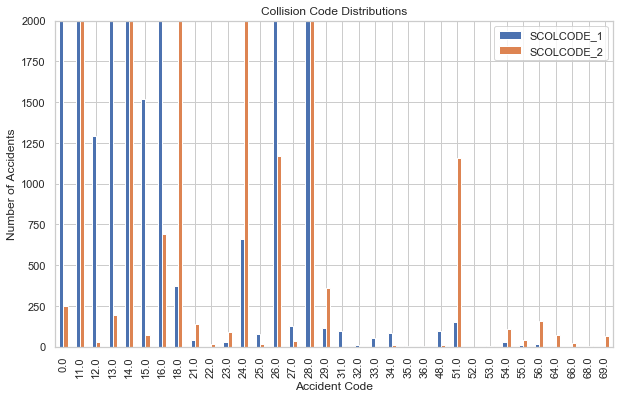

In [275]:
ccodm_df.plot(kind='bar')
plt.ylim([0,2000])
plt.title('Collision Code Distributions')
plt.ylabel('Number of Accidents')
plt.xlabel('Accident Code')

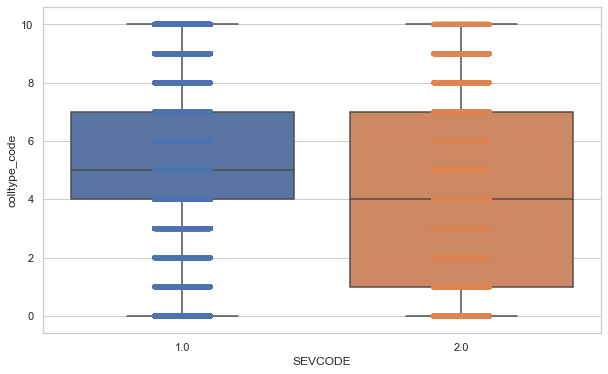

In [37]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SEVCODE',y='colltype_code',data=model_df)
ax = sns.stripplot(x="SEVCODE", y="colltype_code",data=model_df)

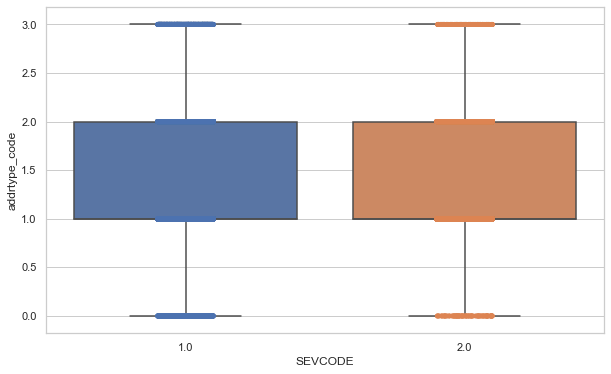

In [38]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SEVCODE',y='addrtype_code',data=model_df)
ax = sns.stripplot(x="SEVCODE", y="addrtype_code",data=model_df)

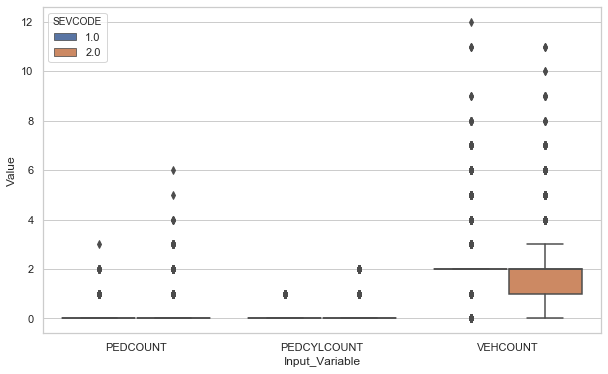

In [19]:
model_df_pedveh = pd.melt(model_df_colset1, "SEVCODE", var_name="Input_Variable", value_name="Value")
sns.boxplot(x="Input_Variable", hue="SEVCODE", y="Value", data=model_df_pedveh )

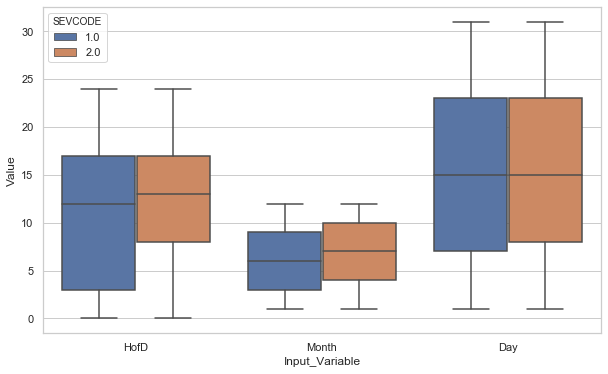

In [24]:
model_df_datetime = pd.melt(model_df_colset2, "SEVCODE", var_name="Input_Variable", value_name="Value")
sns.boxplot(x="Input_Variable", hue="SEVCODE", y="Value", data=model_df_datetime)

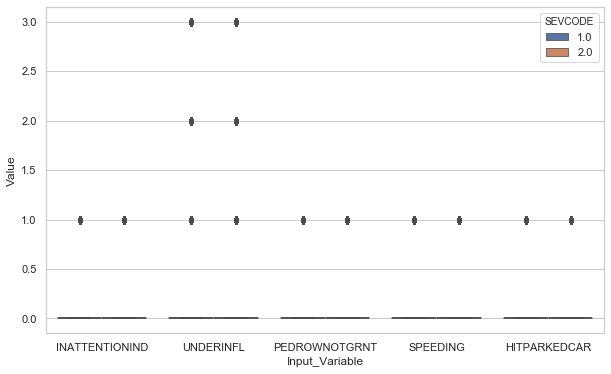

In [29]:
model_df_endo = pd.melt(model_df_colset3, "SEVCODE", var_name="Input_Variable", value_name="Value")
sns.boxplot(x="Input_Variable", hue="SEVCODE", y="Value", data=model_df_endo)

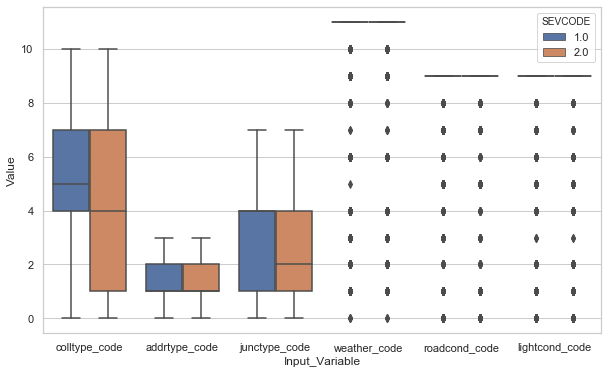

In [30]:
model_df_exog = pd.melt(model_df_colset4, "SEVCODE", var_name="Input_Variable", value_name="Value")
sns.boxplot(x="Input_Variable", hue="SEVCODE", y="Value", data=model_df_exog)